#### 2018 Mashine Learning course at the Faculty of Physics, Astronomy and Applied Computer Science

## Lab class no. 14  - Introduction to Natural Language Processing
by Piotr Warchoł

In this notebook, we will explore the capabilities of the ntlk python library, a popular tool for natural language processing.

See www.nltk.org 

As this is our last class, there will be no homework today, however the tie you will need to do the exercises (at the end of the notebook) might exceed the time for the classes.

In [1]:
#The usuall stuff:

# To support both python 2 and python 3
# from __future__ import division, print_function, unicode_literals

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10



import numpy as np
import random
#import os

import warnings
warnings.filterwarnings('ignore')



# to make this notebook's output stable across runs
np.random.seed(21)

In [2]:
%matplotlib inline

In [3]:
!python --version

Python 3.6.3 :: Anaconda custom (64-bit)


In [4]:
import nltk

In [5]:
# a window will open with an interface for downloading corpora and other files. You can download all.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Text Analysis Using nltk.text

lets start with some simple analysis of short texts.

In [6]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

We can perform tokenization with word_tokenize()


In [7]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
tokens = word_tokenize(my_string)
tokens = [word.lower() for word in tokens]
tokens[:10]

['two', 'plus', 'two', 'is', 'four', ',', 'minus', 'one', 'that', "'s"]

We can easily go to nltk.text text form

In [8]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

This method of converting raw strings to NLTK `Text` instances can be used when reading text from a file. For instance:
```python
f = open('my-file.txt','rU') # Opening a file with the mode 'U' or 'rU' will open a file for reading in universal newline mode. All three line ending conventions will be translated to a "\n"
raw = f.read()
```

concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.
concordance() is defined as follows: concordance(self, word, width=79, lines=25). Note default values for optional params.

In [9]:
t.concordance('uckers') 

Displaying 1 of 1 matches:
 girl in the park , that girl is an uckers . when the thing went quack quack q


Collocations give you the words (be deafault pairs) that are placed next to eachother in the text

In [10]:
t.collocations() # def collocations(self, num=20, window_size=2). num is the max no. of collocations to print.

hold tight; quack quack


W ecan count the number of instances of a given word in the text

In [11]:
t.count('quack')

3

The tokens in the text are indexed

In [12]:
t.index('two')

0

You can look for similar words in the text.

In [13]:
t.similar('brother') 
# similar(self, word, num=20). 
#Distributional similarity: find other words which appear in the same contexts as the specified word; 
#list most similar words first.

guy


PLot positions of words in the text

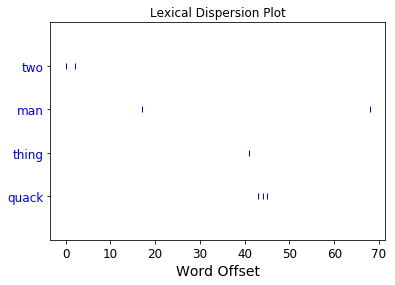

In [14]:
t.dispersion_plot(['two','man','thing', 'quack']) 
# Reveals patterns in word positions. 
#Each stripe represents an instance of a word, and each row represents the entire text.

and the number statistic of differen tokens

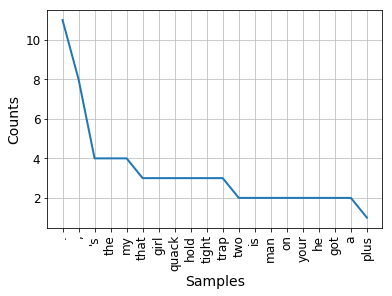

In [15]:
t.plot(20) # plots 20 most common tokens

You can can generate the full vocabulary with token counts

In [16]:
t.vocab()

FreqDist({'!': 1,
          "'s": 4,
          ',': 8,
          '.': 11,
          'a': 2,
          'an': 1,
          'asznee': 1,
          'block': 1,
          'brother': 1,
          'cornflakes': 1,
          'crispies': 1,
          'day': 1,
          'ducking': 1,
          'every': 1,
          'four': 1,
          'frisbee': 1,
          'girl': 3,
          'got': 2,
          'guy': 1,
          'he': 2,
          'hold': 3,
          'i': 1,
          'in': 1,
          'is': 2,
          'man': 2,
          'maths': 1,
          'men': 1,
          'minus': 1,
          'moving': 1,
          'my': 4,
          'on': 2,
          'one': 1,
          'park': 1,
          'phone': 1,
          'plus': 1,
          'pumpy': 1,
          'quack': 3,
          'quick': 1,
          'rice': 1,
          'see': 1,
          'smoke': 1,
          'that': 3,
          'the': 4,
          'thing': 1,
          'three': 1,
          'tight': 3,
          'trap': 3,
          'tre

Another thing that might be useful in analysis is finding common contexts. Our text is too small so we will use a bigger one.

NLTK comes with several interesting **corpora**, which are large collections of text. You can check out what kinds of corpora are found in `nltk.corpus` in Section 1 [here](http://www.nltk.org/book/ch02.html).

`reuters` is a corpus of news documents. More specifically, `reuters` is a *corpus reader* for the Reuters corpus which provides us with methods to access the corpus:

In [17]:
from nltk.corpus import reuters
text = Text(reuters.words()) 
# .words() is one method corpus readers provide for reading data from a corpus. 
text.common_contexts(['August', 'June']) 
# It seems that .common_contexts() takes 2 words which are used similarly and displays
# where they are used similarly. It also seems that '_' indicates where the words would be in the text.

in_1986 and_and by_. begins_1 paid_1986 in_, early_. or_, /_shipment
of_. last_. for_shipment for_to on_3 on_12 on_19 last_when in_.
in_1987 -_.


We will now explore other methods of nltk, with the help of the Reuters corpus

# Bigrams, Stemming and Lemmatizing

## 1. Exploring the `reuters` corpus

In [18]:
from nltk.corpus import reuters

reuters.readme().replace('\n', ' ')

'       The Reuters-21578 benchmark corpus, ApteMod version  This is a publically available version of the well-known Reuters-21578 "ApteMod" corpus for text categorization.  It has been used in publications like these:   * Yiming Yang and X. Liu. "A re-examination of text categorization    methods".  1999.  Proceedings of 22nd Annual International SIGIR.    http://citeseer.nj.nec.com/yang99reexamination.html   * Thorsten Joachims. "Text categorization with support vector    machines: learning with many relevant features".  1998. Proceedings    of ECML-98, 10th European Conference on Machine Learning.    http://citeseer.nj.nec.com/joachims98text.html  ApteMod is a collection of 10,788 documents from the Reuters financial newswire service, partitioned into a training set with 7769 documents and a test set with 3019 documents.  The total size of the corpus is about 43 MB.  It is also available for download from http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html , which inclu

In [19]:
#the ids of files in the corpus
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [20]:
reuters.fileids()[-1]

'training/9995'

In [21]:
len(reuters.fileids())

10788

 the Reuters corpus in NLTK corpus API:

- The Reuters-21578 "ApteMod" corpus is built for text classification.

- ApteMod is a collection of 10,788 documents from the Reuters financial newswire service

- In the ApteMod corpus, each document belongs to one or more categories. There are 90 categories in the corpus.

 

In [22]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

The sents() function divides the text up into its sentences, where each sentence is a list of words

In [23]:
reuters.sents('test/14826')

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

## 2. Bigrams

In [24]:
trade_words = reuters.words(categories='trade')
len(trade_words)

142723

In [25]:
trade_words_condensed = trade_words[:100]
trade_words_condensed

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

In [26]:
from nltk.corpus import stopwords

# Remove stopwords from trade_words_condensed and lower case it
trade_words_condensed = [w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')]
trade_words_condensed[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting']

In [27]:
import string # Contains string constants eg. ascii_lowercase which is 'a...z', string formatting functions, other string functions like .capwords() and .translate().

# Remove punctuation
# trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation]
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
trade_words_condensed

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u',
 'japan',
 'raised',
 'fears',
 'among',
 'many',
 'asia',
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far',
 'reaching',
 'economic',
 'damage',
 'businessmen',
 'officials',
 'said',
 'told',
 'reuter',
 'correspondents',
 'asian',
 'capitals',
 'u',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u',
 'lead',
 'curbs',
 'american',
 'imports',
 'products',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long']

In [28]:
from nltk import bigrams

bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:5]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', 'japan')]

In [29]:
from nltk import FreqDist

bi_fdist = FreqDist(bi_trade_words_condensed)

for word, frequency in bi_fdist.most_common(3):
    print(word, frequency)

('u', 'japan') 2
('asian', 'exporters') 1
('exporters', 'fear') 1


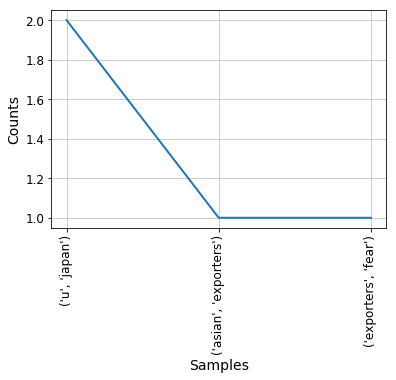

In [30]:
bi_fdist.plot(3, cumulative=False)

## 3. Stemming

In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation.

In [31]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))

re-test re-testing re-test


In [32]:
# Fun fact: SnowballStemmer can stem several other languages beside English.
# To make, for instance, a French stemmer, we can do the following: french_stemmer = SnowballStemmer('french')
SnowballStemmer.languages

('danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [33]:
#from nltk import word_tokenize

sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

# This uses the 3-argument version of str.maketrans with arguments (x, y, z) where 'x' and 'y' must be equal-length
#strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here) 
#where each character in the string is mapped to None
translator = str.maketrans('', '', string.punctuation)
translator

# This is an alternative that creates a dictionary mapping of every character from string.punctuation to None (this will also work but creates a whole dictionary so is slower)
#translator = str.maketrans(dict.fromkeys(string.punctuation))

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [34]:
sentence.translate(translator)

'So well go no more aroving So late into the night Though the heart be still as loving And the moon be still as bright'

In [35]:
tokens = word_tokenize(sentence.translate(translator))
tokens[:3]

['So', 'well', 'go']

In [36]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens])

['So', 'well', 'go', 'no', 'more', 'arov', 'So', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']
['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright']
['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']


## 4. Lemmatizing

Lemmatization aims to achieve a similar base "stem" for a word, but aims to derive the genuine dictionary root word, not just a trunctated version of the word.

In [37]:
# The default lemmatization method with the Python NLTK is the WordNet lemmatizer.
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'), wnl.lemmatize('boxes'))

brightening box


In [38]:
# As we saw above, sometimes, if we try to lemmatize a word, it will end up with the same word. This is because the default part of speech is nouns.
wnl.lemmatize('brightening', pos='v')

'brighten'

# Classifying News Documents into Categories

Based on *Another Excercise: Classifying News Documents in Categories: sport, humor, adventure, science fiction, etc...* in [Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

## 1. Exploring the `brown` corpus

The Corpus consists of 500 samples, distributed across 15 genres. Each sample began at a random sentence-boundary in the article or other unit chosen, and continued up to the first sentence boundary after 2,000 words. The corpus originally (1961) contained 1,014,312 words sampled from 15 text categories:

- **A.** PRESS: Reportage *(44 texts)*
- **B.** PRESS: Editorial *(27 texts)*
- **C.** PRESS: Reviews *(17 texts)*
- **D.** RELIGION *(17 texts)*
- **E.** SKILL AND HOBBIES *(36 texts)*
- **F.** POPULAR LORE *(48 texts)*
- **G.** BELLES-LETTRES - Biography, Memoirs, etc. *(75 texts)*
- **H.** MISCELLANEOUS: US Government & House Organs *(30 texts)*
- **J.** LEARNED - Natural sciences, Medicine, Mathematics, etc. *(80 texts)*
- **K.** FICTION: General *(29 texts)*
- **L.** FICTION: Mystery and Detective Fiction *(24 texts)*
- **M.** FICTION: Science *(6 texts)*
- **N.** FICTION: Adventure and Western *(29 texts)*
- **P.** FICTION: Romance and Love Story *(29 texts)*
- **R.** HUMOR *(9 texts)*

In [39]:
from nltk.corpus import brown

In [40]:
brown.readme().replace('\n', ' ')

'BROWN CORPUS  A Standard Corpus of Present-Day Edited American English, for use with Digital Computers.  by W. N. Francis and H. Kucera (1964) Department of Linguistics, Brown University Providence, Rhode Island, USA  Revised 1971, Revised and Amplified 1979  http://www.hit.uib.no/icame/brown/bcm.html  Distributed with the permission of the copyright holder, redistribution permitted. '

In [41]:
brown.fileids()

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10',
 'ca11',
 'ca12',
 'ca13',
 'ca14',
 'ca15',
 'ca16',
 'ca17',
 'ca18',
 'ca19',
 'ca20',
 'ca21',
 'ca22',
 'ca23',
 'ca24',
 'ca25',
 'ca26',
 'ca27',
 'ca28',
 'ca29',
 'ca30',
 'ca31',
 'ca32',
 'ca33',
 'ca34',
 'ca35',
 'ca36',
 'ca37',
 'ca38',
 'ca39',
 'ca40',
 'ca41',
 'ca42',
 'ca43',
 'ca44',
 'cb01',
 'cb02',
 'cb03',
 'cb04',
 'cb05',
 'cb06',
 'cb07',
 'cb08',
 'cb09',
 'cb10',
 'cb11',
 'cb12',
 'cb13',
 'cb14',
 'cb15',
 'cb16',
 'cb17',
 'cb18',
 'cb19',
 'cb20',
 'cb21',
 'cb22',
 'cb23',
 'cb24',
 'cb25',
 'cb26',
 'cb27',
 'cc01',
 'cc02',
 'cc03',
 'cc04',
 'cc05',
 'cc06',
 'cc07',
 'cc08',
 'cc09',
 'cc10',
 'cc11',
 'cc12',
 'cc13',
 'cc14',
 'cc15',
 'cc16',
 'cc17',
 'cd01',
 'cd02',
 'cd03',
 'cd04',
 'cd05',
 'cd06',
 'cd07',
 'cd08',
 'cd09',
 'cd10',
 'cd11',
 'cd12',
 'cd13',
 'cd14',
 'cd15',
 'cd16',
 'cd17',
 'ce01',
 'ce02',
 'ce03',
 'ce04',
 'ce05',
 'ce06',
 

In [42]:
# these categories are assigned now
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [43]:
brown.sents('ca01')[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

## 2. Compiling list of most popular words in corpus

In [44]:
from nltk import FreqDist # Takes a bunch of tokens and returns the frequencies of all unique cases.
words_in_corpora = FreqDist(w.lower() for w in brown.words() if w.isalpha()) # Checking if the word is alphabetical avoids including stuff like `` and '' which are actually pretty common. Note that it also omits words such as 1 (very common), aug., 1913, $30, 13th, over-all etc. Another option would have been .isalnum().
words_in_corpora

FreqDist({'the': 69971,
          'fulton': 17,
          'county': 155,
          'grand': 48,
          'jury': 67,
          'said': 1961,
          'friday': 60,
          'an': 3740,
          'investigation': 51,
          'of': 36412,
          'recent': 179,
          'primary': 96,
          'election': 77,
          'produced': 90,
          'no': 2139,
          'evidence': 204,
          'that': 10594,
          'any': 1344,
          'irregularities': 8,
          'took': 426,
          'place': 570,
          'further': 218,
          'in': 21337,
          'presentments': 1,
          'city': 393,
          'executive': 55,
          'committee': 168,
          'which': 3561,
          'had': 5133,
          'charge': 122,
          'deserves': 16,
          'praise': 17,
          'and': 28853,
          'thanks': 37,
          'atlanta': 35,
          'for': 9489,
          'manner': 124,
          'was': 9815,
          'conducted': 55,
          'term': 79,
         

In [45]:
words_in_corpora_freq_sorted = list(map(list, words_in_corpora.items())) # I use this instead of sorted() because I want to sort my dictionary into a (mutable) list in order to delete the second column as opposed to into a tuple (immutable).
words_in_corpora_freq_sorted

[['the', 69971],
 ['fulton', 17],
 ['county', 155],
 ['grand', 48],
 ['jury', 67],
 ['said', 1961],
 ['friday', 60],
 ['an', 3740],
 ['investigation', 51],
 ['of', 36412],
 ['recent', 179],
 ['primary', 96],
 ['election', 77],
 ['produced', 90],
 ['no', 2139],
 ['evidence', 204],
 ['that', 10594],
 ['any', 1344],
 ['irregularities', 8],
 ['took', 426],
 ['place', 570],
 ['further', 218],
 ['in', 21337],
 ['presentments', 1],
 ['city', 393],
 ['executive', 55],
 ['committee', 168],
 ['which', 3561],
 ['had', 5133],
 ['charge', 122],
 ['deserves', 16],
 ['praise', 17],
 ['and', 28853],
 ['thanks', 37],
 ['atlanta', 35],
 ['for', 9489],
 ['manner', 124],
 ['was', 9815],
 ['conducted', 55],
 ['term', 79],
 ['been', 2472],
 ['charged', 57],
 ['by', 5306],
 ['superior', 46],
 ['court', 230],
 ['judge', 77],
 ['durwood', 1],
 ['pye', 1],
 ['to', 26158],
 ['investigate', 11],
 ['reports', 84],
 ['possible', 374],
 ['won', 68],
 ['ivan', 4],
 ['allen', 20],
 ['only', 1748],
 ['a', 23195],
 ['re

In [46]:
words_in_corpora_freq_sorted.sort(key=lambda x: x[1], reverse=True) # Using a lambda function is an alternative to using the operator library.
words_in_corpora_freq_sorted

[['the', 69971],
 ['of', 36412],
 ['and', 28853],
 ['to', 26158],
 ['a', 23195],
 ['in', 21337],
 ['that', 10594],
 ['is', 10109],
 ['was', 9815],
 ['he', 9548],
 ['for', 9489],
 ['it', 8760],
 ['with', 7289],
 ['as', 7253],
 ['his', 6996],
 ['on', 6741],
 ['be', 6377],
 ['at', 5372],
 ['by', 5306],
 ['i', 5164],
 ['this', 5145],
 ['had', 5133],
 ['not', 4610],
 ['are', 4394],
 ['but', 4381],
 ['from', 4370],
 ['or', 4206],
 ['have', 3942],
 ['an', 3740],
 ['they', 3620],
 ['which', 3561],
 ['one', 3292],
 ['you', 3286],
 ['were', 3284],
 ['her', 3036],
 ['all', 3001],
 ['she', 2860],
 ['there', 2728],
 ['would', 2714],
 ['their', 2669],
 ['we', 2652],
 ['him', 2619],
 ['been', 2472],
 ['has', 2437],
 ['when', 2331],
 ['who', 2252],
 ['will', 2245],
 ['more', 2215],
 ['if', 2198],
 ['no', 2139],
 ['out', 2097],
 ['so', 1985],
 ['said', 1961],
 ['what', 1908],
 ['up', 1890],
 ['its', 1858],
 ['about', 1815],
 ['into', 1791],
 ['than', 1790],
 ['them', 1788],
 ['can', 1772],
 ['only', 17

In [47]:
best1500 = words_in_corpora_freq_sorted[:1500]

for list_item in best1500:
    del list_item[1]

best1500

[['the'],
 ['of'],
 ['and'],
 ['to'],
 ['a'],
 ['in'],
 ['that'],
 ['is'],
 ['was'],
 ['he'],
 ['for'],
 ['it'],
 ['with'],
 ['as'],
 ['his'],
 ['on'],
 ['be'],
 ['at'],
 ['by'],
 ['i'],
 ['this'],
 ['had'],
 ['not'],
 ['are'],
 ['but'],
 ['from'],
 ['or'],
 ['have'],
 ['an'],
 ['they'],
 ['which'],
 ['one'],
 ['you'],
 ['were'],
 ['her'],
 ['all'],
 ['she'],
 ['there'],
 ['would'],
 ['their'],
 ['we'],
 ['him'],
 ['been'],
 ['has'],
 ['when'],
 ['who'],
 ['will'],
 ['more'],
 ['if'],
 ['no'],
 ['out'],
 ['so'],
 ['said'],
 ['what'],
 ['up'],
 ['its'],
 ['about'],
 ['into'],
 ['than'],
 ['them'],
 ['can'],
 ['only'],
 ['other'],
 ['new'],
 ['some'],
 ['could'],
 ['time'],
 ['these'],
 ['two'],
 ['may'],
 ['then'],
 ['do'],
 ['first'],
 ['any'],
 ['my'],
 ['now'],
 ['such'],
 ['like'],
 ['our'],
 ['over'],
 ['man'],
 ['me'],
 ['even'],
 ['most'],
 ['made'],
 ['also'],
 ['after'],
 ['did'],
 ['many'],
 ['before'],
 ['must'],
 ['af'],
 ['through'],
 ['back'],
 ['years'],
 ['where'],
 ['mu

In [48]:
# Since best1500 is now a list of words, it should be flattened.
import itertools
chain = itertools.chain(*best1500) # We break down the list into its individual sublists and then chain them. What chain does is that it further breaks down each sublist into its individual components so this approach can be used to flatten any list of lists.
best1500 = list(chain) # chain is of type itertools.chain so we need the cast
best1500

['the',
 'of',
 'and',
 'to',
 'a',
 'in',
 'that',
 'is',
 'was',
 'he',
 'for',
 'it',
 'with',
 'as',
 'his',
 'on',
 'be',
 'at',
 'by',
 'i',
 'this',
 'had',
 'not',
 'are',
 'but',
 'from',
 'or',
 'have',
 'an',
 'they',
 'which',
 'one',
 'you',
 'were',
 'her',
 'all',
 'she',
 'there',
 'would',
 'their',
 'we',
 'him',
 'been',
 'has',
 'when',
 'who',
 'will',
 'more',
 'if',
 'no',
 'out',
 'so',
 'said',
 'what',
 'up',
 'its',
 'about',
 'into',
 'than',
 'them',
 'can',
 'only',
 'other',
 'new',
 'some',
 'could',
 'time',
 'these',
 'two',
 'may',
 'then',
 'do',
 'first',
 'any',
 'my',
 'now',
 'such',
 'like',
 'our',
 'over',
 'man',
 'me',
 'even',
 'most',
 'made',
 'also',
 'after',
 'did',
 'many',
 'before',
 'must',
 'af',
 'through',
 'back',
 'years',
 'where',
 'much',
 'your',
 'way',
 'well',
 'down',
 'should',
 'because',
 'each',
 'just',
 'those',
 'people',
 'too',
 'how',
 'little',
 'state',
 'good',
 'very',
 'make',
 'world',
 'still',
 'see',

In [49]:
from nltk.corpus import stopwords

stopw = stopwords.words('english')

# Receives a list of words and removes stop words from list
def nonstop(listwords):
    return [word for word in listwords if word not in stopw]

best1500_words_corpora = nonstop(best1500) # Note how this will probably contain less than 1500 words.
best1500_words_corpora

['one',
 'would',
 'said',
 'new',
 'could',
 'time',
 'two',
 'may',
 'first',
 'like',
 'man',
 'even',
 'made',
 'also',
 'many',
 'must',
 'af',
 'back',
 'years',
 'much',
 'way',
 'well',
 'people',
 'little',
 'state',
 'good',
 'make',
 'world',
 'still',
 'see',
 'men',
 'work',
 'long',
 'get',
 'life',
 'never',
 'day',
 'another',
 'know',
 'last',
 'us',
 'might',
 'great',
 'old',
 'year',
 'come',
 'since',
 'go',
 'came',
 'right',
 'used',
 'take',
 'three',
 'states',
 'house',
 'use',
 'without',
 'place',
 'american',
 'around',
 'however',
 'home',
 'small',
 'found',
 'thought',
 'went',
 'say',
 'part',
 'general',
 'high',
 'upon',
 'school',
 'every',
 'got',
 'united',
 'left',
 'number',
 'course',
 'war',
 'always',
 'away',
 'something',
 'fact',
 'water',
 'though',
 'public',
 'less',
 'put',
 'think',
 'almost',
 'hand',
 'enough',
 'took',
 'far',
 'head',
 'yet',
 'government',
 'system',
 'set',
 'better',
 'told',
 'night',
 'nothing',
 'end',
 'call

## 3. Converting corpus to form suitable for classification

Each file in the corpus will eventually be represented by a dictionary showing the presence of the corpus’ most popular words in the particular file.

In [50]:
# documents = [(nonstop(brown.words(fileid)), category) for category in brown.categories() for fileid in brown.fileids(category)]
# documents # Note how documents is a list of tuples.

# The code above generates a representation of the corpus but without removing punctuation. This is better:
documents = [([item.lower() for item in nonstop(brown.words(fileid)) if item.isalpha()], category)
             for category in brown.categories()
             for fileid in brown.fileids(category)]
documents[1] # Note how documents is a list of tuples.

(['gavin',
  'paused',
  'wearily',
  'you',
  'stay',
  'late',
  'said',
  'dawn',
  'you',
  'make',
  'go',
  'gavin',
  'sank',
  'chair',
  'began',
  'rock',
  'he',
  'thinking',
  'rittenhouse',
  'left',
  'rock',
  'death',
  'porch',
  'splendide',
  'it',
  'thing',
  'life',
  'felt',
  'guilt',
  'beneath',
  'black',
  'shirt',
  'frail',
  'shoulders',
  'shook',
  'croaks',
  'pain',
  'broke',
  'throat',
  'stored',
  'pain',
  'shattering',
  'free',
  'slow',
  'gasps',
  'terrible',
  'see',
  'clayton',
  'tried',
  'call',
  'back',
  'face',
  'man',
  'known',
  'against',
  'man',
  'could',
  'rally',
  'anger',
  'bent',
  'man',
  'chair',
  'powerless',
  'lips',
  'moved',
  'clayton',
  'stoop',
  'catch',
  'words',
  'do',
  'remember',
  'big',
  'charlie',
  'he',
  'whispered',
  'he',
  'stuck',
  'years',
  'just',
  'never',
  'said',
  'much',
  'never',
  'meant',
  'anythin',
  'stuck',
  'he',
  'got',
  'fight',
  'tom',
  'english',
  'so

In [51]:
from random import shuffle

shuffle(documents)
documents[1]

(['a',
  'former',
  'du',
  'pont',
  'official',
  'became',
  'general',
  'motors',
  'vice',
  'president',
  'set',
  'maximizing',
  'du',
  'share',
  'general',
  'motors',
  'market',
  'lines',
  'communications',
  'established',
  'two',
  'companies',
  'several',
  'du',
  'pont',
  'products',
  'actively',
  'promoted',
  'within',
  'years',
  'various',
  'du',
  'pont',
  'manufactured',
  'items',
  'filling',
  'entire',
  'requirements',
  'four',
  'seven',
  'general',
  'eight',
  'operating',
  'divisions',
  'the',
  'fisher',
  'body',
  'division',
  'long',
  'controlled',
  'fisher',
  'brothers',
  'voting',
  'trust',
  'even',
  'though',
  'general',
  'motors',
  'owned',
  'majority',
  'stock',
  'followed',
  'independent',
  'course',
  'many',
  'years',
  'resistance',
  'collapsed',
  'purchases',
  'du',
  'pont',
  'compared',
  'favorably',
  'purchases',
  'general',
  'motors',
  'divisions',
  'competitors',
  'came',
  'receive',
  'hi

### We build a binary bag of words representation

In [52]:
# Given a document extract features (the presence or not of the 1500 most frequent words of the corpus)
def document_features(doc):
    doc_set_words = set(doc) # Checking whether a word occurs in a set is much faster than checking whether it occurs in a list.
    features_dic = {} # Features is a dictionary
    for word in best1500_words_corpora:
        features_dic['has(%s)' % word] = (word in doc_set_words)
    return features_dic

doc_features_set = [(document_features(d),c) for (d,c) in documents]
doc_features_set[:20]

[({'has(one)': True,
   'has(would)': True,
   'has(said)': True,
   'has(new)': True,
   'has(could)': True,
   'has(time)': True,
   'has(two)': True,
   'has(may)': False,
   'has(first)': False,
   'has(like)': True,
   'has(man)': True,
   'has(even)': True,
   'has(made)': True,
   'has(also)': True,
   'has(many)': True,
   'has(must)': True,
   'has(af)': False,
   'has(back)': True,
   'has(years)': True,
   'has(much)': True,
   'has(way)': True,
   'has(well)': False,
   'has(people)': False,
   'has(little)': True,
   'has(state)': False,
   'has(good)': True,
   'has(make)': False,
   'has(world)': True,
   'has(still)': True,
   'has(see)': True,
   'has(men)': False,
   'has(work)': False,
   'has(long)': False,
   'has(get)': True,
   'has(life)': True,
   'has(never)': True,
   'has(day)': True,
   'has(another)': False,
   'has(know)': True,
   'has(last)': False,
   'has(us)': False,
   'has(might)': True,
   'has(great)': True,
   'has(old)': True,
   'has(year)': T

## 4. Building the classifier

In [53]:
from nltk import NaiveBayesClassifier

train_set = doc_features_set[:350] # Since the total is 500
test_set  = doc_features_set[150:]

classifier = NaiveBayesClassifier.train(train_set)
classifier.show_most_informative_features(15)

Most Informative Features
           has(happened) = True           scienc : learne =     30.0 : 1.0
               has(gone) = True           scienc : learne =     30.0 : 1.0
               has(wait) = True           scienc : learne =     30.0 : 1.0
              has(story) = True            humor : learne =     28.3 : 1.0
            has(playing) = True           review : learne =     27.8 : 1.0
             has(annual) = True             news : learne =     23.1 : 1.0
                has(sat) = True           fictio : learne =     22.3 : 1.0
            has(british) = True           review : learne =     21.3 : 1.0
           has(watching) = True           romanc : learne =     20.5 : 1.0
             has(walked) = True           myster : learne =     19.9 : 1.0
                has(ran) = True           advent : learne =     19.6 : 1.0
             has(berlin) = True           editor : learne =     18.8 : 1.0
               has(stop) = True           romanc : learne =     18.8 : 1.0

## 5. Testing classifier

In [54]:
from nltk.classify import accuracy

print(accuracy(classifier, test_set))

0.7714285714285715


In [55]:
# 'ca01' is under the 'news' category
classifier.classify(document_features(brown.words('ca01')))

'news'

In [56]:
from nltk.tokenize import RegexpTokenizer

# The test text needs to be long enough in order to contain a significant amount of the 1500 most common words in our training corpus.
text = "1 God, infinitely perfect and blessed in himself, in a plan of sheer goodness freely created man to make him share in his own blessed life. For this reason, at every time and in every place, God draws close to man. He calls man to seek him, to know him, to love him with all his strength. He calls together all men, scattered and divided by sin, into the unity of his family, the Church. To accomplish this, when the fullness of time had come, God sent his Son as Redeemer and Saviour. In his Son and through him, he invites men to become, in the Holy Spirit, his adopted children and thus heirs of his blessed life. 2 So that this call should resound throughout the world, Christ sent forth the apostles he had chosen, commissioning them to proclaim the gospel: \"Go therefore and make disciples of all nations, baptizing them in the name of the Father and of the Son and of the Holy Spirit, teaching them to observe all that I have commanded you; and lo, I am with you always, to the close of the age.\"4 Strengthened by this mission, the apostles \"went forth and preached everywhere, while the Lord worked with them and confirmed the message by the signs that attended it.\" 3 Those who with God's help have welcomed Christ's call and freely responded to it are urged on by love of Christ to proclaim the Good News everywhere in the world. This treasure, received from the apostles, has been faithfully guarded by their successors. All Christ's faithful are called to hand it on from generation to generation, by professing the faith, by living it in fraternal sharing, and by celebrating it in liturgy and prayer. 4 Quite early on, the name catechesis was given to the totality of the Church's efforts to make disciples, to help men believe that Jesus is the Son of God so that believing they might have life in his name, and to educate and instruct them in this life, thus building up the body of Christ. Catechesis is an education in the faith of children, young people and adults which includes especially the teaching of Christian doctrine imparted, generally speaking, in an organic and systematic way, with a view to initiating the hearers into the fullness of Christian life. While not being formally identified with them, catechesis is built on a certain number of elements of the Church's pastoral mission which have a catechetical aspect, that prepare for catechesis, or spring from it. They are: the initial proclamation of the Gospel or missionary preaching to arouse faith; examination of the reasons for belief; experience of Christian living; celebration of the sacraments; integration into the ecclesial community; and apostolic and missionary witness. Catechesis is intimately bound up with the whole of the Church's life. Not only her geographical extension and numerical increase, but even more her inner growth and correspondence with God's plan depend essentially on catechesis. Periods of renewal in the Church are also intense moments of catechesis. In the great era of the Fathers of the Church, saintly bishops devoted an important part of their ministry to catechesis. St. Cyril of Jerusalem and St. John Chrysostom, St. Ambrose and St. Augustine, and many other Fathers wrote catechetical works that remain models for us. The ministry of catechesis draws ever fresh energy from the councils. the Council of Trent is a noteworthy example of this. It gave catechesis priority in its constitutions and decrees. It lies at the origin of the Roman Catechism, which is also known by the name of that council and which is a work of the first rank as a summary of Christian teaching. The Council of Trent initiated a remarkable organization of the Church's catechesis. Thanks to the work of holy bishops and theologians such as St. Peter Canisius, St. Charles Borromeo, St. Turibius of Mongrovejo or St. Robert Bellarmine, it occasioned the publication of numerous catechisms. It is therefore no surprise that catechesis in the Church has again attracted attention in the wake of the Second Vatican Council, which Pope Paul Vl considered the great catechism of modern times. the General Catechetical Directory (1971) the sessions of the Synod of Bishops devoted to evangelization (1974) and catechesis (1977), the apostolic exhortations Evangelii nuntiandi (1975) and Catechesi tradendae (1979), attest to this. the Extraordinary Synod of Bishops in 1985 asked that a catechism or compendium of all Catholic doctrine regarding both faith and morals be composed. The Holy Father, Pope John Paul II, made the Synod's wish his own, acknowledging that this desire wholly corresponds to a real need of the universal Church and of the particular Churches. He set in motion everything needed to carry out the Synod Fathers' wish."

tokenizer = RegexpTokenizer(r'\w+') # Picks out sequences of alphanumeric characters as tokens and drops everything else
text_tokens = nonstop(tokenizer.tokenize(text.lower()))
text_tokens = [w for w in text_tokens if w.isalpha()]
text_tokens

['god',
 'infinitely',
 'perfect',
 'blessed',
 'plan',
 'sheer',
 'goodness',
 'freely',
 'created',
 'man',
 'make',
 'share',
 'blessed',
 'life',
 'reason',
 'every',
 'time',
 'every',
 'place',
 'god',
 'draws',
 'close',
 'man',
 'calls',
 'man',
 'seek',
 'know',
 'love',
 'strength',
 'calls',
 'together',
 'men',
 'scattered',
 'divided',
 'sin',
 'unity',
 'family',
 'church',
 'accomplish',
 'fullness',
 'time',
 'come',
 'god',
 'sent',
 'son',
 'redeemer',
 'saviour',
 'son',
 'invites',
 'men',
 'become',
 'holy',
 'spirit',
 'adopted',
 'children',
 'thus',
 'heirs',
 'blessed',
 'life',
 'call',
 'resound',
 'throughout',
 'world',
 'christ',
 'sent',
 'forth',
 'apostles',
 'chosen',
 'commissioning',
 'proclaim',
 'gospel',
 'go',
 'therefore',
 'make',
 'disciples',
 'nations',
 'baptizing',
 'name',
 'father',
 'son',
 'holy',
 'spirit',
 'teaching',
 'observe',
 'commanded',
 'lo',
 'always',
 'close',
 'age',
 'strengthened',
 'mission',
 'apostles',
 'went',
 'f

In [57]:
text_features = document_features(text_tokens)
text_features

{'has(one)': False,
 'has(would)': False,
 'has(said)': False,
 'has(new)': False,
 'has(could)': False,
 'has(time)': True,
 'has(two)': False,
 'has(may)': False,
 'has(first)': True,
 'has(like)': False,
 'has(man)': True,
 'has(even)': True,
 'has(made)': True,
 'has(also)': True,
 'has(many)': True,
 'has(must)': False,
 'has(af)': False,
 'has(back)': False,
 'has(years)': False,
 'has(much)': False,
 'has(way)': True,
 'has(well)': False,
 'has(people)': True,
 'has(little)': False,
 'has(state)': False,
 'has(good)': True,
 'has(make)': True,
 'has(world)': True,
 'has(still)': False,
 'has(see)': False,
 'has(men)': True,
 'has(work)': True,
 'has(long)': False,
 'has(get)': False,
 'has(life)': True,
 'has(never)': False,
 'has(day)': False,
 'has(another)': False,
 'has(know)': True,
 'has(last)': False,
 'has(us)': True,
 'has(might)': True,
 'has(great)': True,
 'has(old)': False,
 'has(year)': False,
 'has(come)': True,
 'has(since)': False,
 'has(go)': True,
 'has(came)'

In [58]:
classifier.classify(document_features(text_tokens))

'religion'

# Sentiment Analysis

Based on *Exercise B: Sentiment Analysis* in [Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

## 1. Exploring the `movie_reviews` corpus

In [59]:
from nltk.corpus import movie_reviews # These are movie reviews already separated as positive and negative.
movie_reviews.readme().replace('\n', ' ').replace('\t', '').replace('``', '"').replace("''", '"').replace('`', "'")

'Sentiment Polarity Dataset Version 2.0 Bo Pang and Lillian Lee  http://www.cs.cornell.edu/people/pabo/movie-review-data/  Distributed with NLTK with permission from the authors.  =======  Introduction  This README v2.0 (June, 2004) for the v2.0 polarity dataset comes from the URL http://www.cs.cornell.edu/people/pabo/movie-review-data .  =======  What\'s New -- June, 2004  This dataset represents an enhancement of the review corpus v1.0 described in README v1.1: it contains more reviews, and labels were created with an improved rating-extraction system.  =======  Citation Info   This data was first used in Bo Pang and Lillian Lee, "A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization  Based on Minimum Cuts",  Proceedings of the ACL, 2004.  @InProceedings{Pang+Lee:04a,   author =       {Bo Pang and Lillian Lee},   title =        {A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts},   booktitle =    "Proceedings of 

In [60]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [61]:
len(movie_reviews.fileids())

2000

In [62]:
movie_reviews.raw("neg/cv000_29416.txt").replace("\n", "").replace("'", '"').replace('"', "'") # Note here I found a trick to get rid of \' in text. However it only works if there were no " used.

"plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and ' sorta ' find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off ' normal ' but then downshifts into this ' fantasy ' world in which you , as an audience member , have no idea what's

## 2. Building and testing the classifier

In [63]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.extend('.,[,],(,),;,/,-,\',?,",:,<,>,n\'t,|,#,\'s,\",\'re,\'ve,\'ll,\'d,\'re'.split(','))
stops.extend(',')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
from nltk.classify import NaiveBayesClassifier
import nltk.classify.util # Utility functions and classes for classifiers. Contains functions such as accuracy(classifier, gold)

# Given a word, returns a dict {word: True}. This will be our feature in the classifier. 
def word_feats(words):
    return dict([(word, True) for word in words if word not in stops and word.isalpha()])

pos_ids = movie_reviews.fileids('pos')
neg_ids = movie_reviews.fileids('neg')

len(pos_ids) + len(neg_ids) 

2000

In [65]:
# We take the positive/negative words, create the feature for such words, and store it in a positive/negative features list.
pos_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in pos_ids]
neg_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in neg_ids]

pos_feats

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [66]:
# 3/4 of the features will be used for training.
pos_len_train = int(len(pos_feats) * 3 / 4)
neg_len_train = int(len(neg_feats) * 3 / 4)

pos_len_train

750

In [67]:
train_feats = neg_feats[:neg_len_train] + pos_feats[:pos_len_train]
test_feats = neg_feats[neg_len_train:] + pos_feats[pos_len_train:]

# Training a NaiveBayesClassifier with our training feature words.
classifier = NaiveBayesClassifier.train(train_feats)

print('Accuracy: ', nltk.classify.util.accuracy(classifier, test_feats))

Accuracy:  0.712


In [68]:
# We can see which words fit best in each class.
classifier.show_most_informative_features()

Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0


## 3. Classifying new data

In [69]:
from nltk import word_tokenize, pos_tag

sentence = "I feel so miserable, it makes me amazing"
tokens = [word for word in word_tokenize(sentence) if word not in stops]
tokens

['I', 'feel', 'miserable', 'makes', 'amazing']

In [70]:
feats = word_feats(word for word in tokens)
feats

{'I': True, 'amazing': True, 'feel': True, 'makes': True, 'miserable': True}

In [71]:
classifier.classify(feats)

'pos'

In [72]:
sentence2 = "You are a pathetic fool, a terrible excuse for a human being."
tokens2 = [word for word in word_tokenize(sentence2) if word not in stops]
tokens2

['You', 'pathetic', 'fool', 'terrible', 'excuse', 'human']

In [73]:
pos_tags2 = [pos for pos in pos_tag(tokens2) if pos[1] == 'JJ']
pos_tags2

[('pathetic', 'JJ'), ('terrible', 'JJ')]

In [74]:
feats2 = word_feats([word for (word,_) in pos_tags2])
feats2

{'pathetic': True, 'terrible': True}

In [75]:
classifier.classify(feats2)

'neg'

### Jour job for today

1) Modify the binary Bag of Words document representation of the Brown corpus to its tf-idf version. That is, instead of True/False for each of the 1500 most popular words, output the tf-idf number as the feature, namely the frequency of the word in the given document times the logarithm of the ratio of all the documents and the number of documents in which this word occurs (see lecture). Check the test accuracy  with those new features. Check if it improves if you consider more words (more then the 1500 more popular) and not necesserly the most popular ones.

2) Implement Laten Dirichlet Analysis and use it for the sentiment analysis corpus with two hidden topics (see lecture). Try to visualise how the words are distributed in each of the resulting topics (for example plotting p(w |t) with respect to the words arranged according to their repersentation in topic one, for both the topics). Do the topics reflect the negative/positive sentiment? One way to check that is to perform the classification based on the result of running the algorithm, then, for example P( t=1 | d)>0.5 classifies d as being dominated by topic 1 (and perhaps having possitive sentiment). So it amounts to checking if the accuracy on the sentiment analysis task is satisfying with t=1 associated with positive and t=2 with negative sentiment, or the other way around. 